<a href="https://colab.research.google.com/github/shiraDuek/SS_a_ariel/blob/Neuro_Computational/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**מבוא לנוירו חישוביות - מטלה 1**


:מגישים

דביר אופטובסקי 326063260
שירה דואק 325175115

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**:מה שראינו במצגת בכיתה**

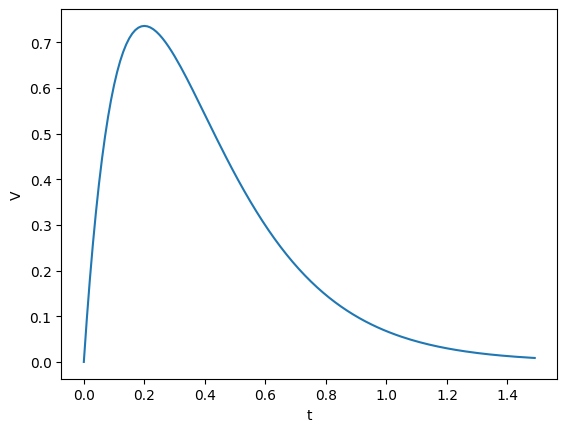

In [2]:
t_peak = 0.2
A = 1
t = np.arange(0 ,1.5 ,0.01)
V = A*t*np.exp(-t /t_peak)*10
plt.plot(t ,V)
plt.xlabel ("t")
plt.ylabel ("V")

plt.show()

**q1:**

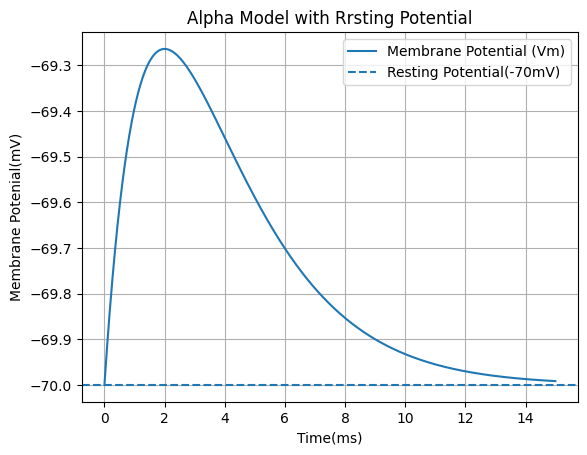

In [3]:
t_peak = 2
resting_potential = -70.0
A = 1

t = np.arange(0 ,15 ,0.01)
V = A*t*np.exp(-t /t_peak)-70

plt.plot(t, V, label="Membrane Potential (Vm)")

plt.axhline(resting_potential, linestyle='--', label="Resting Potential(-70mV)")

plt.legend()

plt.title("Alpha Model with Rrsting Potential")
plt.xlabel ("Time(ms)")
plt.ylabel ("Membrane Potenial(mV)")
plt.grid()
plt.show()

**q2:**

In [4]:
def membrane_potential(t, V_max, t_peak):
    alpha = (t / t_peak) * np.exp(1 - t / t_peak)
    alpha_max = (1 / np.e)
    return V_max * (alpha / alpha_max) + resting_potential

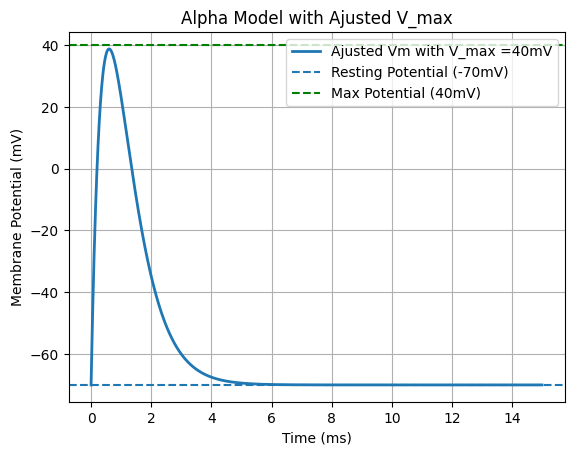

In [5]:

V_max = 40
resting_potential = -70
t_peak = 0.6

V = membrane_potential(t, V_max, t_peak)

plt.plot(t, V, label="Ajusted Vm with V_max =40mV", linewidth=2)

plt.axhline(resting_potential, linestyle="--", linewidth=1.5, label="Resting Potential (-70mV)")

plt.axhline( V_max, color="green", linestyle="--", linewidth=1.5, label="Max Potential (40mV)")

plt.title("Alpha Model with Ajusted V_max")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")

plt.legend(loc="upper right")

plt.grid()

plt.show()


**q3:**

In [6]:
def depolarization(t, V_resting, V_max, t_peak):
    return V_resting + (V_max - V_resting) * (1 - np.exp(-5 * t / t_peak))

In [7]:
def repolarization(t, V_max, V_hyper, t_peak, t_repolarize_end):
    return V_max - (V_max - V_hyper) * (1 - np.exp(-5 * (t - t_peak) / (t_repolarize_end - t_peak)))


In [8]:
def hyperpolarization(t, V_hyper, V_resting, t_repolarize_end, t_recover_end):
    return V_hyper + (V_resting - V_hyper) * (1 - np.exp(-5 * (t - t_repolarize_end) / (t_recover_end - t_repolarize_end)))


In [9]:
def action_potential(t, V_resting, V_max, V_hyper, t_peak, t_repolarize_end, t_recover_end):
    V = np.zeros_like(t)

    for i, t_i in enumerate(t):
        if t_i <= t_peak:
            V[i] = depolarization(t_i, V_resting, V_max, t_peak)
        elif t_peak < t_i <= t_repolarize_end:
            V[i] = repolarization(t_i, V_max, V_hyper, t_peak, t_repolarize_end)
        else:
            V[i] = hyperpolarization(t_i, V_hyper, V_resting, t_repolarize_end, t_recover_end)

    return V

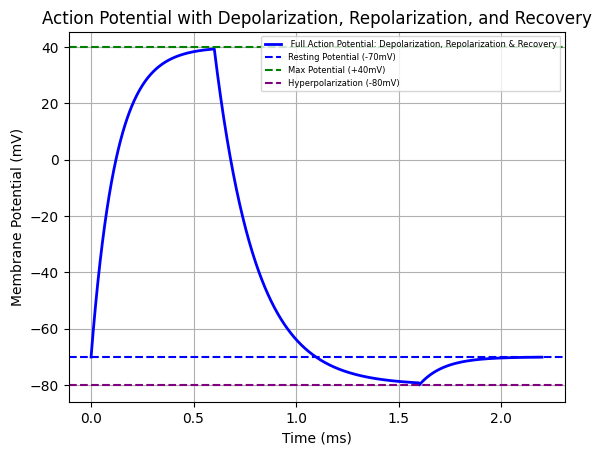

In [10]:


# פרמטרים
V_resting = -70  # פוטנציאל מנוחה
V_max = 40  # פוטנציאל מקסימלי
V_hyper = -80  # פוטנציאל היפרפולריזציה
t_peak = 0.6  # זמן לפוטנציאל המרבי (ms)
t_repolarize_end = 1.6  # זמן סיום הרפולריזציה (ms)
t_recover_end = 2.2  # זמן סיום ההתאוששות (ms)

t = np.linspace(0, t_recover_end, 1000)

V = action_potential(t, V_resting, V_max, V_hyper, t_peak, t_repolarize_end, t_recover_end)


plt.plot(t, V, label=" Full Action Potential: Depolarization, Repolarization & Recovery", color="blue", linewidth=2)


plt.axhline(V_resting, linestyle="--", linewidth=1.5, color="blue", label="Resting Potential (-70mV)")
plt.axhline(V_max, linestyle="--", linewidth=1.5, color="green", label="Max Potential (+40mV)")
plt.axhline(V_hyper, linestyle="--", linewidth=1.5, color="purple", label="Hyperpolarization (-80mV)")

plt.title("Action Potential with Depolarization, Repolarization, and Recovery")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")

# plt.legend(loc="upper right")
plt.legend(loc="upper right", bbox_to_anchor=(1, 1), fontsize=6)


plt.grid()

plt.show()
